<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      displayMath: [['$$','$$'], ['\\[','\\]']]
    },
    TeX: {
      extensions: ["color.js"]
    },
    "HTML-CSS": {
      availableFonts: ["TeX"],
      linebreaks: { automatic: true }
    }
  });
</script>

<script src="https://cdn.jsdelivr.net/npm/mathjax@2/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>

<style>
@media all {
  body {
    font-weight: 700;
  }
  /* Rende le formule MathJax più spesse */
  .MathJax, .MathJax_Display {
    font-weight: bold; /* Aumenta lo spessore delle formule */
  }
  .bold-text {
    font-weight: bold;
  }
  .heavy-text {
    font-weight: 700;
  }
}
</style>

# <span style="color: red;">CAR EVALUATION</span>
---
## Metadata

<span style="font-size: 14px;">

- Abstract: Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.
- Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/car+evaluation)
- UCI_id: 19
- Year: 1997
- Number of Instances: 1728 ( = $\prod_{i=1}^{N} |x_i|$ = 4 x 4 x 4 x 3 x 3 x 3) $\to$ <span style="color: red;">Exhaustive DataSet</span>
- Number of Attributes: 6
- Summary: Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica Volume 1, Number 1, pp. 145-157, 1990. The model evaluates cars according to the following concept structure:


    | Variable Name | Role    | Type         | Description                    | Units | Missing Values |
    |---------------|---------|--------------|--------------------------------|-------|----------------|
    | buying        | Feature |Ordinal  | buying price                        |   NA  | no             |
    | maint         | Feature | Ordinal  | price of the maintenance           |   NA  | no             |
    | doors         | Feature | Ordinal  | number of doors                    |   NA  | no             |
    | persons       | Feature | Ordinal  | capacity in terms of persons to carry| NA  | no             |
    | lug_boot      | Feature | Ordinal  | the size of luggage boot           |   NA  | no             |
    | safety        | Feature | Ordinal  | estimated safety of the ca         |   NA  | no             |
    | class         | Target  | Ordinal  | evaluation level                   |   NA  | no             |

    buying = vhigh, high, med, low <br>
    maint = vhigh, high, med, low <br>
    doors = 2, 3, 4, 5more <br>
    persons = 2, 4, more <br>
    lug_boot = small, med, big <br>
    safety = low, med, high <br>
    class = unacceptable, acceptable, good, very good <br>
</span>


---
## Data loading and preprocessing

No missing values in the dataset
No duplicates in the dataset
Correlation Matrix is diagonal


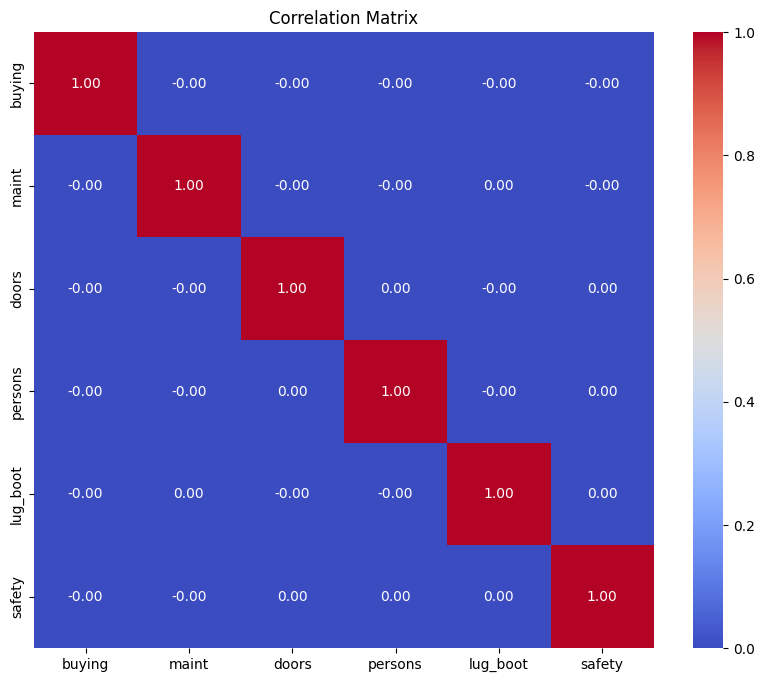

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

path = r"D:/UniBG/38091 Opt/Car Evaluation"
file_path = path + "/Data/Car.csv"
full_df = pd.read_csv(file_path)

# Check for missing values
if full_df.isna().sum().sum() > 0:
    clean_df = full_df.dropna()
    print(f"Dropped {full_df.isna().sum().sum()} missing values in the dataset")
else:
    clean_df = full_df
    print("No missing values in the dataset")

# Check for duplicates
if clean_df.duplicated().sum() > 0:
    clean_df = clean_df.drop_duplicates()
    print(f"Dropped {clean_df.duplicated().sum()} duplicates in the dataset")
else:
    print("No duplicates in the dataset")

# Variables and target encoding
X_clean = clean_df.iloc[:, :-1]
Y_clean = clean_df.iloc[:, -1]

# Map the ordinal values to integers
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
feature_mappings = {
    'buying': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'maint': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
    'persons': {'2': 0, '4': 1, 'more': 2},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2},
    'safety': {'low': 0, 'med': 1, 'high': 2}
}

# Variables and target encoding
Y_encoded = Y_clean.map(class_mapping)
X_encoded = X_clean.copy()
for col, mapping in feature_mappings.items():
    X_encoded[col] = X_clean[col].map(mapping)
classes = np.unique(Y_encoded)
C = len(classes)

if all(isinstance(v, int) for v in class_mapping.values()):
    # Class labels are integers
    class_names = [f"Class {label}" for label in classes]
else:
    # Class labels are strings
    inverse_class_mapping = {v: k for k, v in class_mapping.items()}
    class_names = [inverse_class_mapping[label] for label in classes]
feature_names = X_encoded.columns.tolist()

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Check if the correlation matrix is diagonal
epsilon = 1e-5 # Threshold for the correlation matrix
thresholded_matrix = np.where(np.abs(correlation_matrix) < epsilon, 0, correlation_matrix)
if np.array_equal(thresholded_matrix, np.diag(np.diag(thresholded_matrix))):
    print("Correlation Matrix is diagonal")

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


---

## Import the TPMSVM model

In [2]:
import import_ipynb
import TPMSVM as tpmsvm



---

## Fasten your seatbelts: Model in action!

### Start the engine....

<span style="font-size: 14px;">
We’re about to take off with the latest version of our model. <br>
Hold on tight as we initiate analizing the data and setting the hyperparamenters.

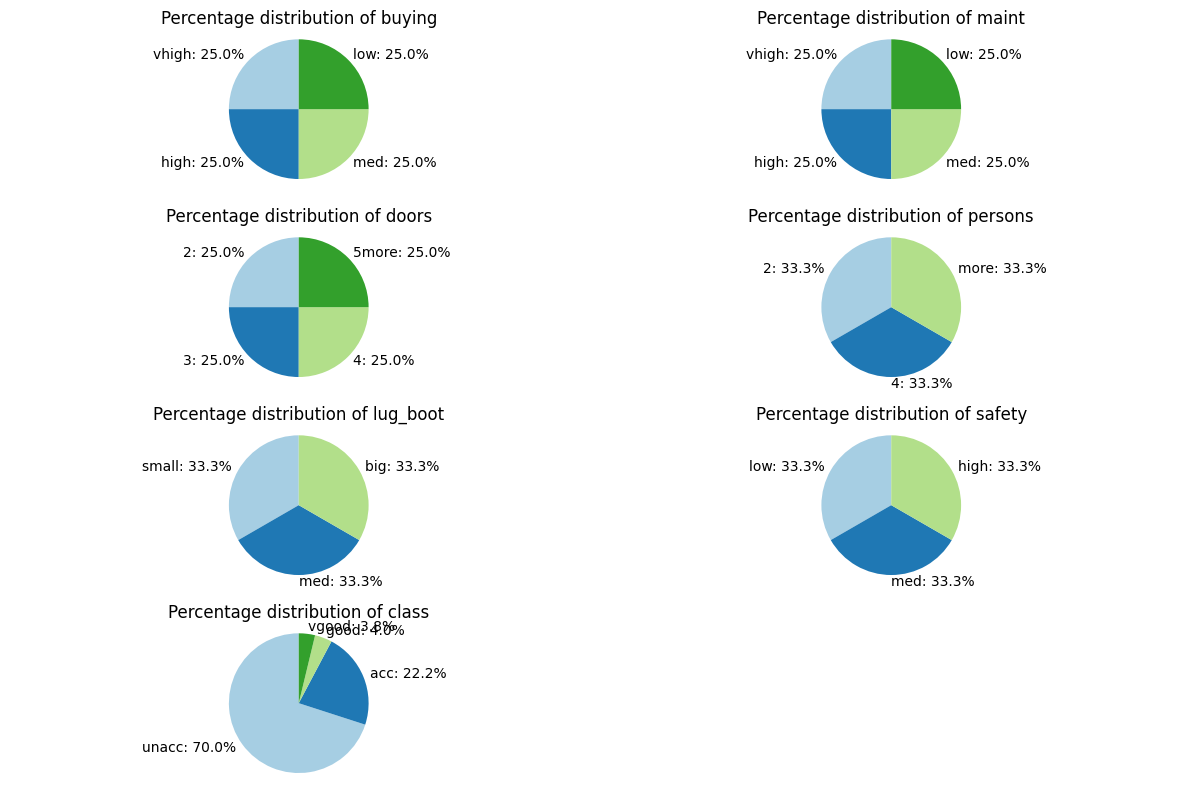

Value of buying: min = 0, max = 3
Value of maint: min = 0, max = 3
Value of doors: min = 0, max = 3
Value of persons: min = 0, max = 2
Value of lug_boot: min = 0, max = 2
Value of safety: min = 0, max = 2


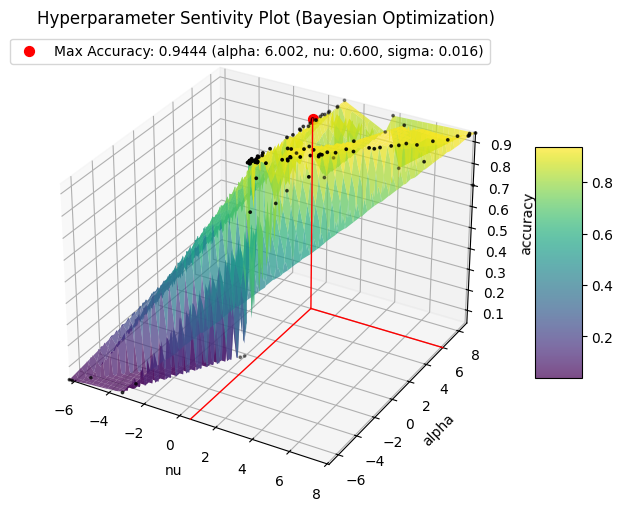

Pivot table of accuracy values and their counts:
    accuracy  count
0   0.944444      1
1   0.940586      2
2   0.938272      3
3     0.9375      3
4   0.936728      4
5   0.935957      2
6   0.935185      1
7   0.934414      3
8   0.933642      8
9    0.93287      3
10   0.93287      2
11  0.932099      6
12  0.931327      5
13  0.930556      6
14  0.929784      3
15  0.929012      6
16  0.928241      5
17  0.927469      3
18  0.926698      2
19  0.925926      1
20  0.925154      2
21  0.924383      2
22   0.92284      4
23  0.922068      2
24  0.919753      1
25  0.917438      1
26  0.840278      1
27  0.838735      1
28   0.83642      1
29   0.83642      1
30  0.834105      1
31  0.699846      7
32  0.037809      7
33     Total    100


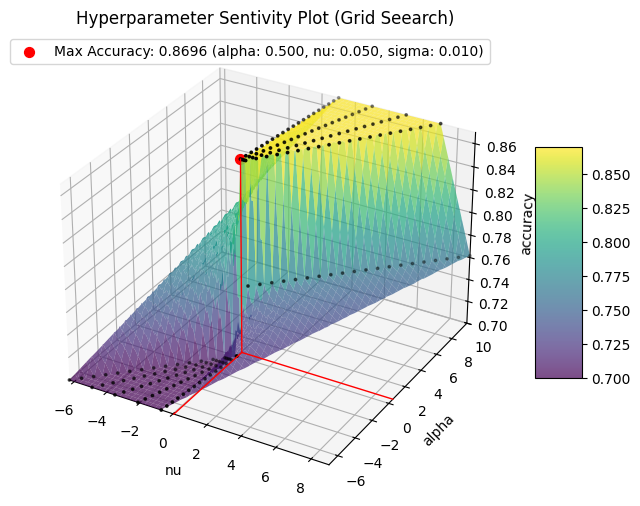

Pivot table of accuracy values and their counts:
   accuracy  count
0  0.869584     80
1  0.761642     20
2  0.699866     73
3  0.699857      1
4  0.699849      1
5     Total    175
Features: 6 
Classes: [0 1 2 3] 
Dataset row: 1728 
Dataset training row: 1296 
Dataset validation row: 432


In [3]:
# Take a look at the data
tpmsvm.take_a_look(clean_df, X_encoded, Y_encoded)
myfile = f'{path}/Accuracy/Car_bayesian2.csv'
tpmsvm.plot_hp_data(myfile,title=' (Bayesian Optimization)')
myfile = f'{path}/Accuracy/Car_grid2.csv'
tpmsvm.plot_hp_data(myfile,title=' (Grid Seearch)')
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = tpmsvm.data_splitting(X_encoded, Y_encoded, classes)
# Optimize the hyper-parameters
best_alpha, best_nu, best_sigma = tpmsvm.optimize_hyper(
      classes, class_mapping, 
      X_train, Y_train, 
      default_alpha = 0.5,
      default_nu    = 0.05, 
      kernel_type = tpmsvm.rbf_kernel,
      default_sigma = 0.01,
      batch_required = None, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_newton, 
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T=500, 
      file_name="Car_new", 
      method='none', 
      verbose=True)


### Go!


Class: 0
- Number of Eigenvalues for H: Positive = 0, Negative = 907, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 91
- gamma function: gamma_inverse
- Initial gamma: 2.00000
- Optimization completed in 1 iterations
- Final gradient norm: 0.00001
- Support vectors found: 907
- w: [-0.01868 -0.01945 -0.02661 -0.0376  -0.02834 -0.03946]
- theta: 0.07748
- R^2: 3.038963154395131e-07
- B  parameter: 30.116440692751194
- L  parameter: 1.0000000000000016
- mu parameter: 0.9999999999999987
- tolerance: 1.000e-03
- T (iterations): 1814001
- max error: 0.0009999988974653845


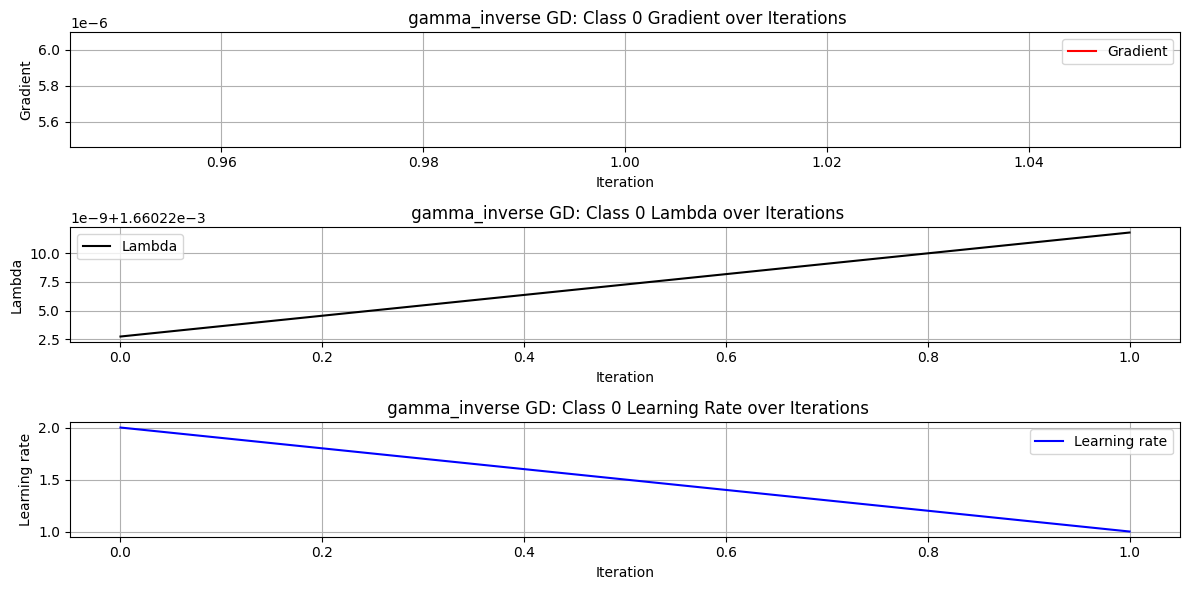


Class: 1
- Number of Eigenvalues for H: Positive = 0, Negative = 288, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 29
- gamma function: gamma_inverse
- Initial gamma: 2.00000
- Optimization completed in 1 iterations
- Final gradient norm: 0.00003
- Support vectors found: 288
- w: [-0.02594 -0.0253  -0.02487 -0.02178 -0.02483 -0.02103]
- theta: 0.08274
- R^2: 3.0140817901234566e-06
- B  parameter: 16.97056274847714
- L  parameter: 1.0000000000000013
- mu parameter: 0.9999999999999983
- tolerance: 1.000e-03
- T (iterations): 576001
- max error: 0.0009999965277898354


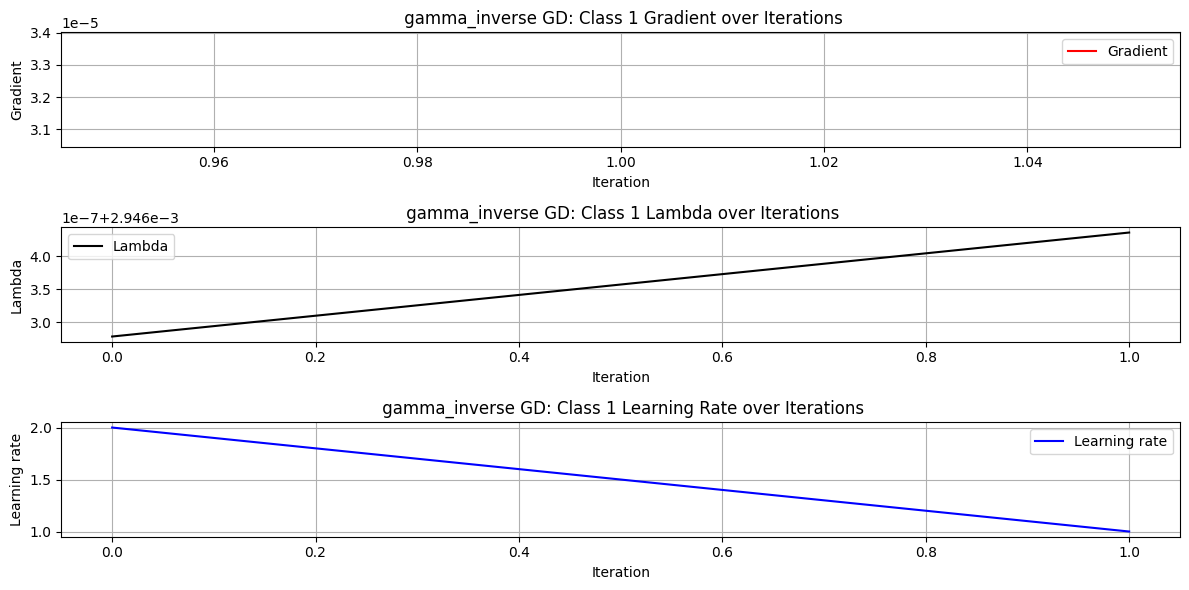


Class: 2
- Number of Eigenvalues for H: Positive = 0, Negative = 52, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 6
- gamma function: gamma_inverse
- Initial gamma: 2.00000
- Optimization completed in 1 iterations
- Final gradient norm: 0.00039
- Support vectors found: 52
- w: [-0.02615 -0.02568 -0.02539 -0.02472 -0.02514 -0.0244 ]
- theta: 0.06719
- R^2: 9.245562130177516e-05
- B  parameter: 7.211102550927978
- L  parameter: 1.000000000000001
- mu parameter: 0.9999999999999991
- tolerance: 1.000e-03
- T (iterations): 104001
- max error: 0.0009999807696005852



Class: 3
- Number of Eigenvalues for H: Positive = 0, Negative = 49, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 5
- gamma function: gamma_inverse
- Initial gamma: 2.00000
- Optimization completed in 1 iterations
- Final gradient norm: 0.00046
- Support vectors found: 49
- w: [-0.02606 -0.02533 -0.02526 -0.02474 -0.02456 -0.02388]
- theta: 0.08660
- R^2: 0.00010412328196584754
- B  parameter: 7.0
- L  parameter: 1.000000000000001
- mu parameter: 0.9999999999999986
- tolerance: 1.000e-03
- T (iterations): 98001
- max error: 0.0009999795922532209



 --- Validation Results ---

Validation accuracy: 0.701 with alpha: 0.500, nu: 0.050 and kernel param: 0.010

              precision    recall  f1-score     support
Class 0        0.702326  0.996700  0.824011  303.000000
Class 1        0.500000  0.010417  0.020408   96.000000
Class 2        0.000000  0.000000  0.000000   17.000000
Class 3        0.000000  0.000000  0.000000   16.000000
accuracy       0.701389  0.701389  0.701389    0.701389
macro avg      0.300581  0.251779  0.211105  432.000000
weighted avg   0.603714  0.701389  0.582487  432.000000

 --- Optimization Results with CVXpy ---

Class: 0
- Support vectors found: 907
- Problem status: optimal

Class: 1
- Support vectors found: 288
- Problem status: optimal

Class: 2
- Support vectors found: 52
- Problem status: optimal

Class: 3
- Support vectors found: 49
- Problem status: optimal

 --- Validation Results with CVXpy ---

Validation accuracy: 0.701 with alpha: 0.500, nu: 0.050 and kernel param: 0.010

              preci

buying: 0.12
maint: 0.17
doors: 0.05
persons: 0.28
lug_boot: 0.15
safety: 0.23


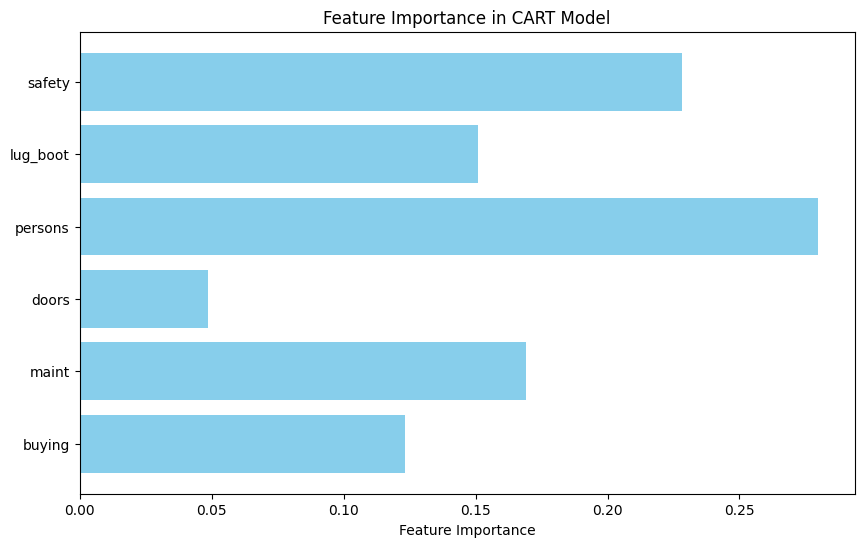


 --- Running Time ---

TPMSVM: 31.26 seconds
CVX: 3.67 seconds
SklearnSVM: 0.05 seconds
SklearnCART: 0.00 seconds


In [ ]:
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Run the TPMSVM model
start_time = time.time()
accuracy, models = tpmsvm.TPMSVM(
      classes, class_mapping,
      X_train, Y_train, 
      X_val, Y_val,
      best_alpha, best_nu,
      kernel_type = tpmsvm.linear_kernel, # Kernel type
      kernel_params = best_sigma, # Kernel parameters
      batch_required = 0.1, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_nag, # Gamma function
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T = 1000,
      verbose=True)
end_TPMSVM = time.time()
# Evaluate the models using CVX.py
tpmsvm.create_model(classes, class_mapping, X_val, Y_val, models)
end_CVX = time.time()
# Evaluate the models using sklearnSVM
tpmsvm.use_sklearnSVM(X_train, Y_train, X_val, Y_val)
end_sklearnSVM = time.time()
# Evaluate the models using sklearnCART
cart_model = tpmsvm.use_sklearnCART(X_train, Y_train, X_val, Y_val)
end_sklearnCART = time.time()
plt.figure(figsize=(12,8))
plot_tree(cart_model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()
# Plot the feature importance in the CART model
importances = cart_model.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.2f}")
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in CART Model')
plt.show()


# Print the time taken for each method
print(f"\n --- Running Time ---\n")
print(f"TPMSVM: {end_TPMSVM - start_time:.2f} seconds")
print(f"CVX: {end_CVX - end_TPMSVM:.2f} seconds")
print(f"SklearnSVM: {end_sklearnSVM - end_CVX:.2f} seconds")
print(f"SklearnCART: {end_sklearnCART - end_sklearnSVM:.2f} seconds")

---
<span style="font-size: 12px;">

- Accuracy: The proportion of correct predictions relative to the total predictions.<br>
- Precision: The proportion of true positives relative to the total predicted positives. It indicates how reliable the positive predictions are.<br>
- Recall: The proportion of true positives relative to the total actual positives. It indicates how well the model finds the positives.<br>
- F1 Score: The harmonic mean of precision and recall. It is useful when there is an imbalance between classes.<br>